In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import seaborn as sns

# SVM Classifier

In [76]:
data1=pd.read_csv('dementia_dataset.csv')

In [77]:
data1

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [78]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [79]:
data1.dropna(inplace=True)
data1

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [80]:
data1.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,1.884181,601.353107,77.033898,14.703390,2.460452,27.409605,0.271186,1489.991525,0.729879,1.193780
std,0.925330,640.596081,7.811808,2.895662,1.134005,3.712626,0.370537,175.768462,0.037842,0.136821
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.250000,0.699000,1.100250
50%,2.000000,559.500000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.500000,0.729000,1.193500
75%,2.000000,882.500000,82.000000,16.750000,3.000000,30.000000,0.500000,1595.250000,0.757000,1.292500
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [81]:
data1['Hand'].unique()

array(['R'], dtype=object)

In [82]:
data1.Group.unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

<AxesSubplot:xlabel='Group'>

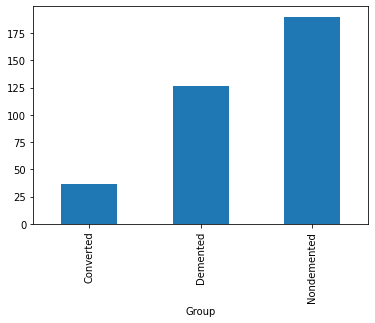

In [85]:
data1.groupby(by='Group').count().Visit.plot(kind='bar')

In [86]:
data1=data1[data1.Group!='Converted']
data1.drop(columns=['Subject ID','MRI ID','Hand'],inplace=True)
data1['Group']=data1.Group.replace({'Nondemented':0,'Demented':1})
data1['M/F']=data1['M/F'].replace({'M':1,'F':0})
data1

/Users/fahmimn21/miniforge3/envs/tf/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/var/folders/jn/3zxggwvn0w9fxzbpwtz0q8p80000gn/T/ipykernel_69463/589045375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Group']=data1.Group.replace({'Nondemented':0,'Demented':1})
/var/folders/jn/3zxggwvn0w9fxzbpwtz0q8p80000gn/T/ipykernel_69463/589045375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,0,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,0,2,538,0,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,0,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,2,842,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,3,2297,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,1,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,2,763,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [87]:
X=data1.drop(columns='Group')
y=data1.Group

<AxesSubplot:>

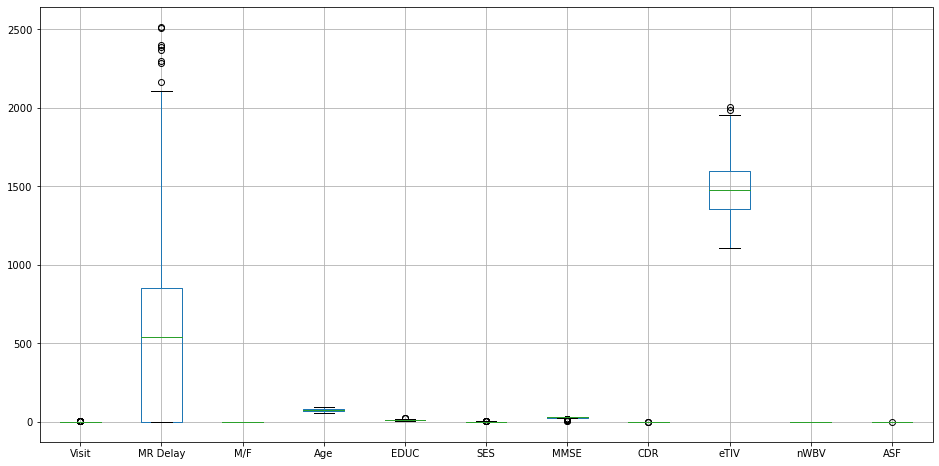

In [88]:
X.boxplot(figsize=(16,8))

<AxesSubplot:>

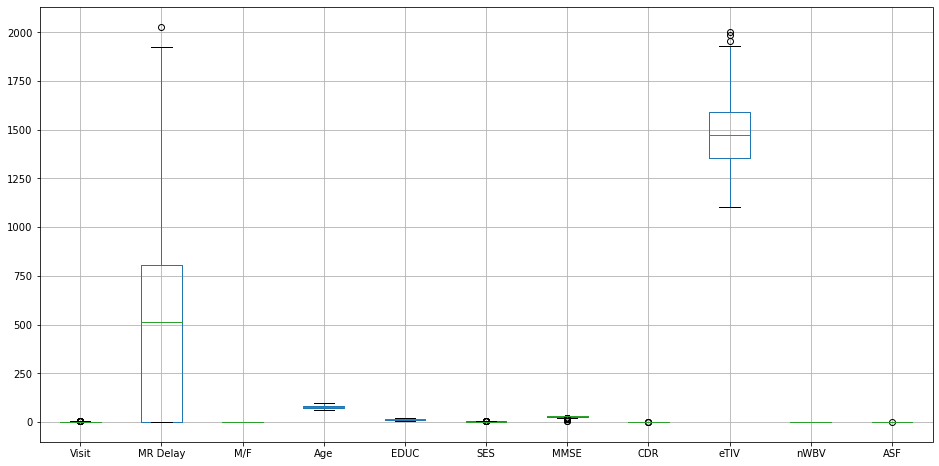

In [89]:
X[X['MR Delay']<=2100].boxplot(figsize=(16,8))

In [90]:
X=X[X['MR Delay']<=2100]
y=y.loc[X.index]
X

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,2,538,0,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...
367,1,0,1,80,16,1.0,28.0,0.5,1704,0.711,1.030
368,2,842,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
370,1,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,2,763,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [91]:
y

0      0
1      0
5      0
6      0
7      0
      ..
367    1
368    1
370    0
371    0
372    0
Name: Group, Length: 308, dtype: int64

In [92]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)
X_std

array([[-0.98195801, -0.96091916,  1.15470054, ...,  2.74979325,
        -0.90418022, -2.21400864],
       [ 0.25250349, -0.13259151,  1.15470054, ...,  2.84418416,
        -1.29759824, -2.26396942],
       [-0.98195801, -0.96091916, -0.8660254 , ..., -1.53666455,
        -0.53699006,  1.78999087],
       ...,
       [-0.98195801, -0.96091916, -0.8660254 , ..., -0.95921427,
         1.84974597,  0.98348116],
       [ 0.25250349,  0.42204364, -0.8660254 , ..., -0.91479502,
         1.71860663,  0.92638313],
       [ 1.48696499,  1.95363415, -0.8660254 , ..., -0.88148058,
         1.84974597,  0.88355961]])

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3,random_state=50,stratify=y)

In [94]:
from sklearn.svm import SVC

model=SVC(kernel='linear',C=0.5)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

In [95]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0])

In [96]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

1.0


In [101]:
#Kernel=rbf dan C=0.5
model=SVC(kernel='rbf',C=0.5)
model.fit(X_train,y_train)

y_pred=model.predict(X)
print(accuracy_score(y,y_pred))

0.5941558441558441


/Users/fahmimn21/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [109]:
#Kernel=linear dan C=0.5
model=SVC(kernel='linear',C=0.5)
model.fit(X_train,y_train)

y_pred=model.predict(X)
print(accuracy_score(y,y_pred))

0.6038961038961039


/Users/fahmimn21/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [120]:
#Kernel=poly dan C=0.5
model=SVC(kernel='poly',C=0.5, degree=1)
model.fit(X_train,y_train)

y_pred=model.predict(X)
print(accuracy_score(y,y_pred))

0.9545454545454546


/Users/fahmimn21/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


# SVR

In [121]:
data2=pd.read_csv('HousingPrices-Amsterdam-August-2021.csv')

In [122]:
data2

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [123]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [124]:
data2.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [126]:
data2.dropna(axis=0,inplace=True)

In [127]:
data2

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [128]:
X=data2[['Area','Room','Lon','Lat']]
y=data2['Price']

<AxesSubplot:>

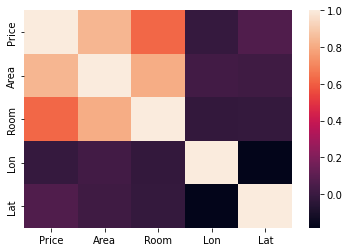

In [129]:
Corr=data2.drop(columns=['Unnamed: 0','Address','Zip']).corr()

sns.heatmap(Corr)

In [130]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [vif(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Area,11.105288
1,Room,17.834197
2,Lon,8381.678634
3,Lat,8400.360469


In [131]:
X1=X.drop(columns='Lat')

vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns
vif_data["VIF"] = [vif(X1.values, i) for i in range(len(X1.columns))]
vif_data

,feature,VIF
0,Area,11.047326
1,Room,17.698256
2,Lon,6.204906


In [134]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X1)

X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3, random_state=50)

In [145]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,r2_score

model=SVR(kernel='linear',C=100,epsilon=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
range_y=y_test.max()-y_test.min()
print('MAE:',mae)
print('Relative MAE:',mae*100/range_y)
print('R2 Score:',r2_score(y_test,y_pred))

MAE: 247069.11807208098
Relative MAE: 4.315617782918445
R2 Score: 0.07788846693823903


In [151]:
model=SVR(kernel='poly',C=100,epsilon=3,degree=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
range_y=y_test.max()-y_test.min()
print('MAE:',mae)
print('Relative MAE:',mae*100/range_y)
print('R2 Score:',r2_score(y_test,y_pred))

MAE: 245636.75188219515
Relative MAE: 4.29059828615188
R2 Score: 0.3306533275801491


In [141]:
model=SVR(kernel='rbf',C=0.5,epsilon=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
range_y=y_test.max()-y_test.min()
print('MAE:',mae)
print('Relative MAE:',mae*100/range_y)
print('R2 Score:',r2_score(y_test,y_pred))

MAE: 271762.0213545467
Relative MAE: 4.746934870821776
R2 Score: -0.05518681334519582
